## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

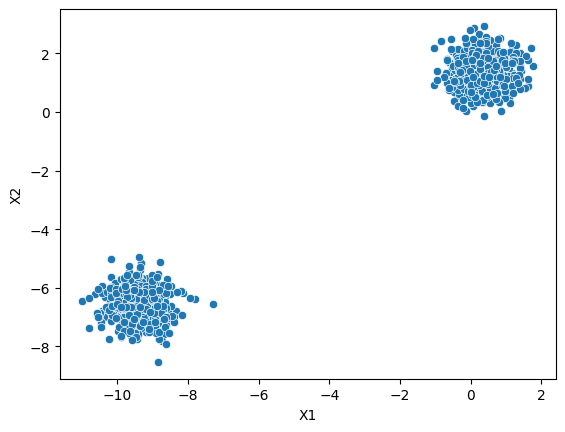

In [3]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

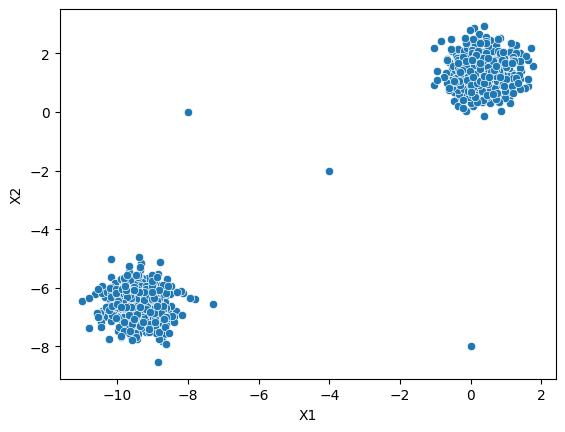

In [4]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [5]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a c

In [8]:
dbscan = DBSCAN()

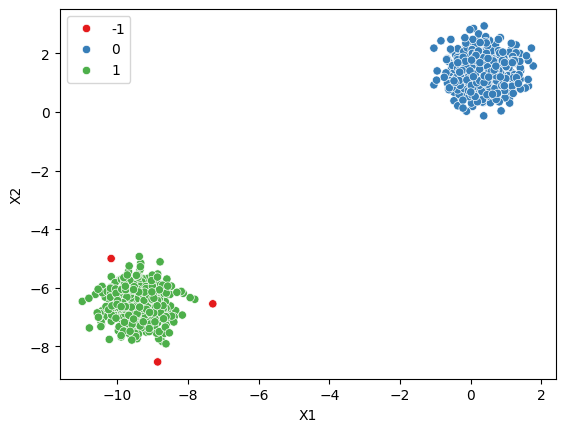

In [9]:
display_categories(dbscan,two_blobs)

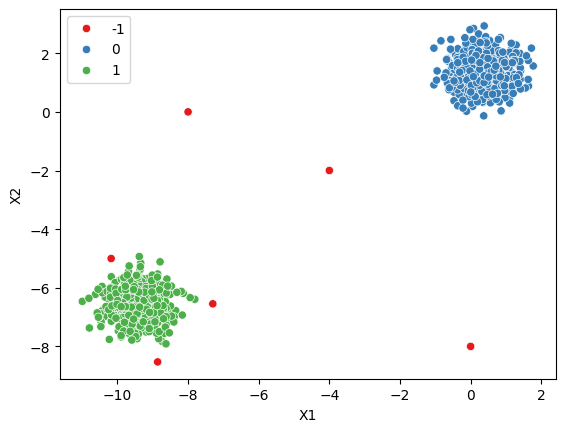

In [10]:

display_categories(dbscan,two_blobs_outliers)

# Epsilon


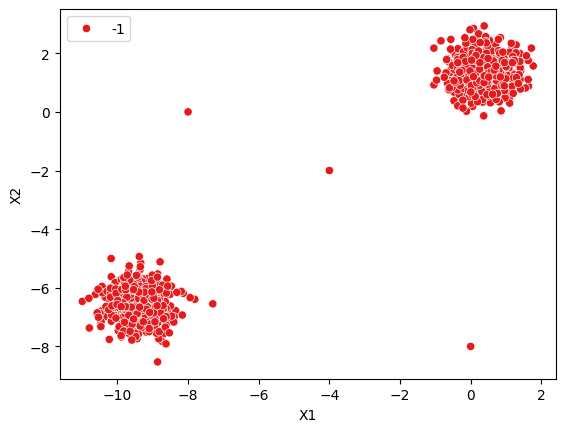

In [11]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

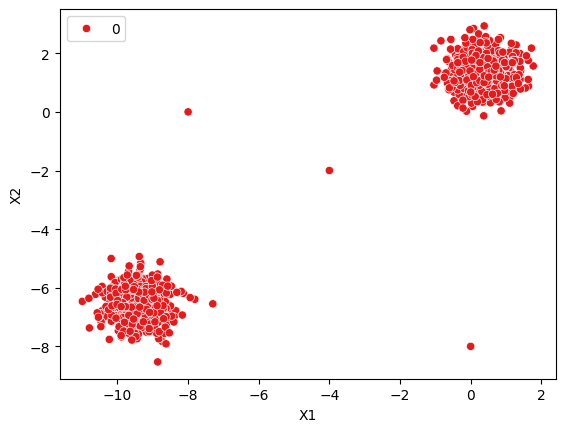

In [12]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

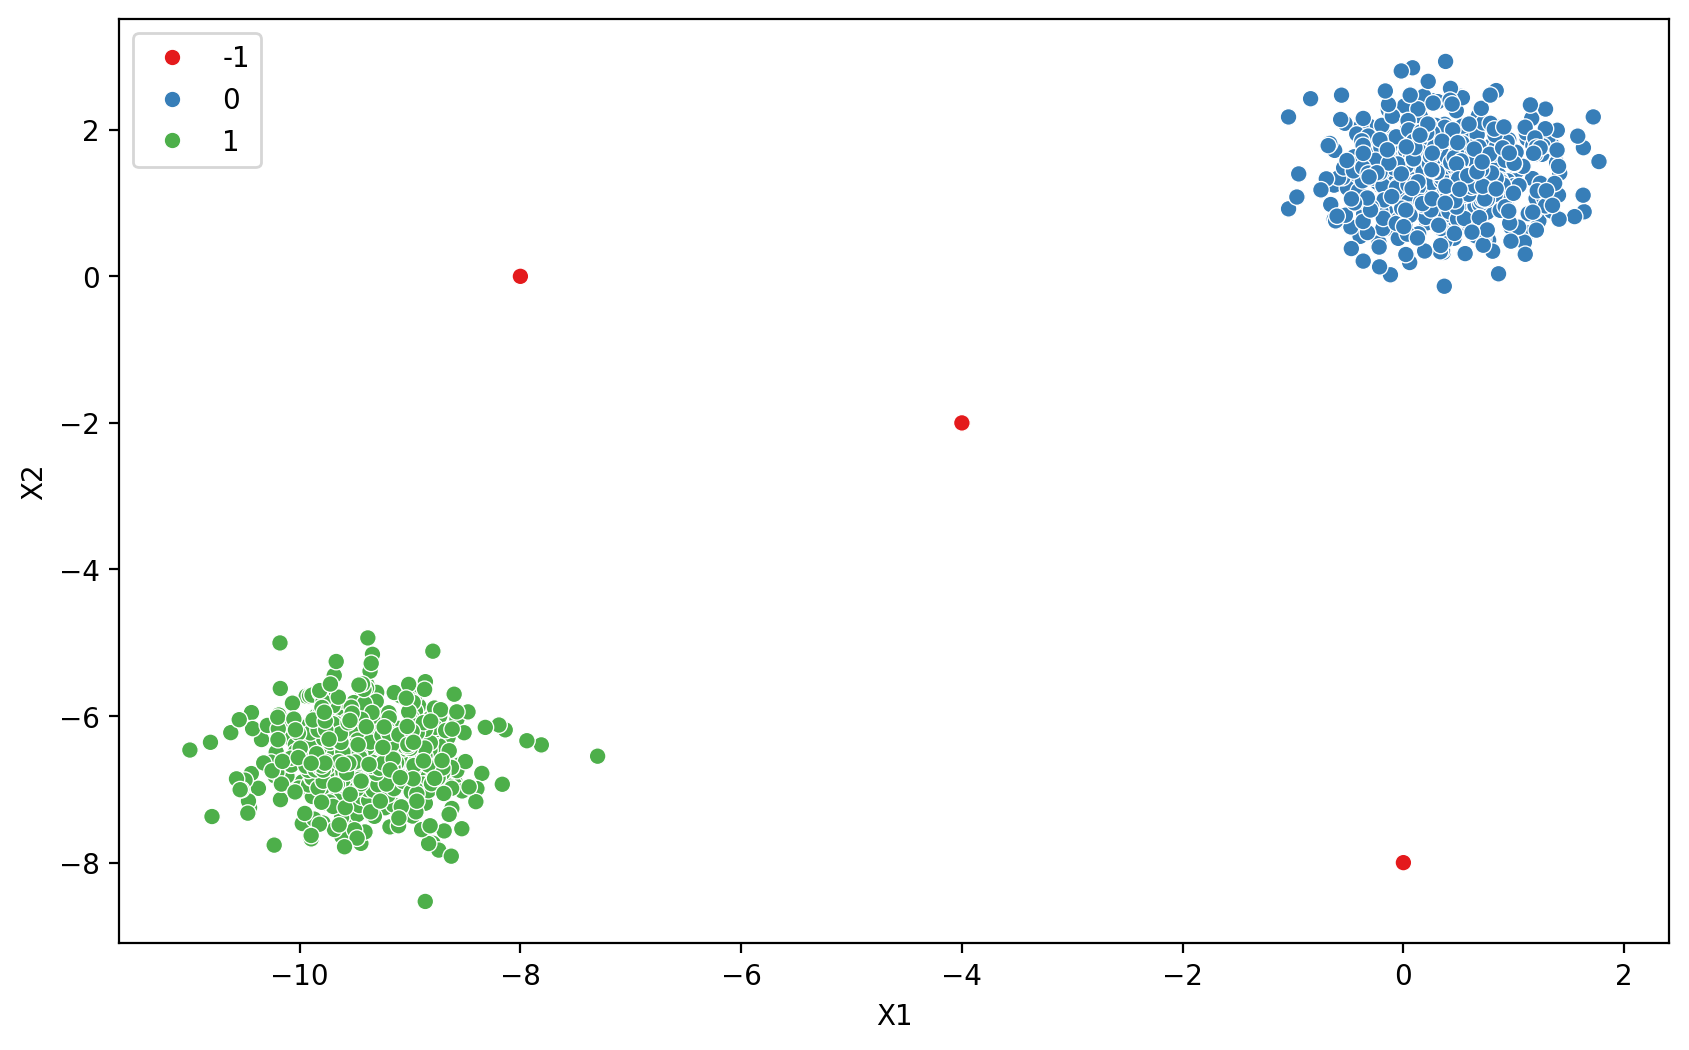

In [13]:
# How to find a good epsilon?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [14]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [15]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [16]:
np.sum(dbscan.labels_ == -1)

3

In [17]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

## Charting reasonable Epsilon values

In [20]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

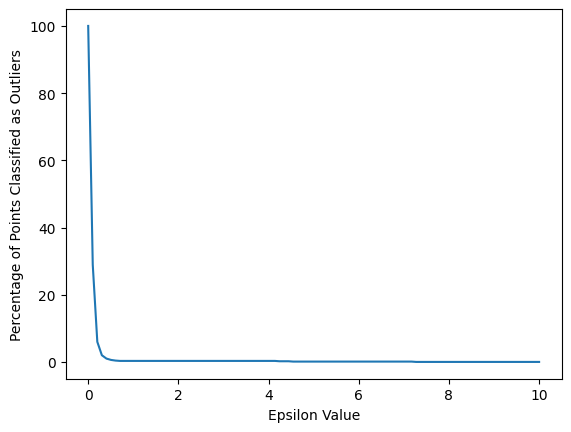

In [21]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

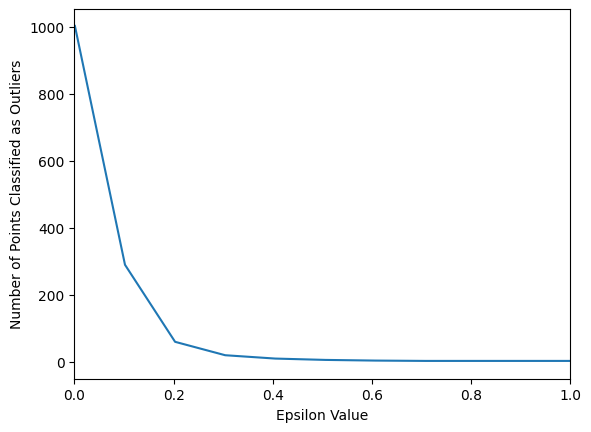

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?


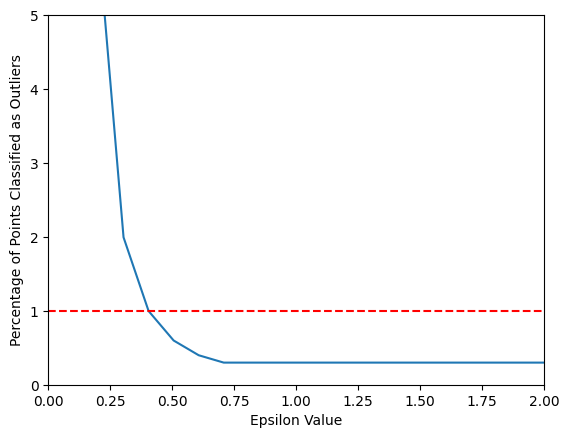

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

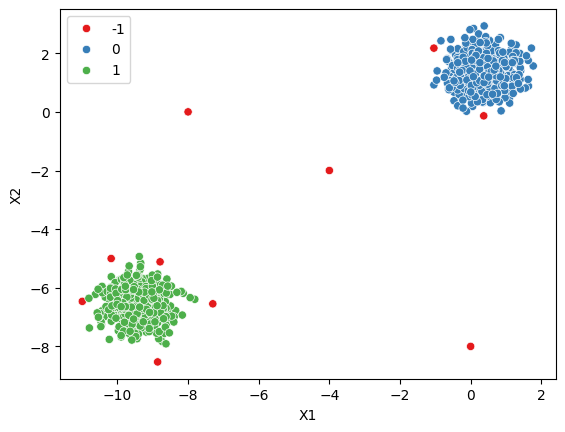

In [24]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

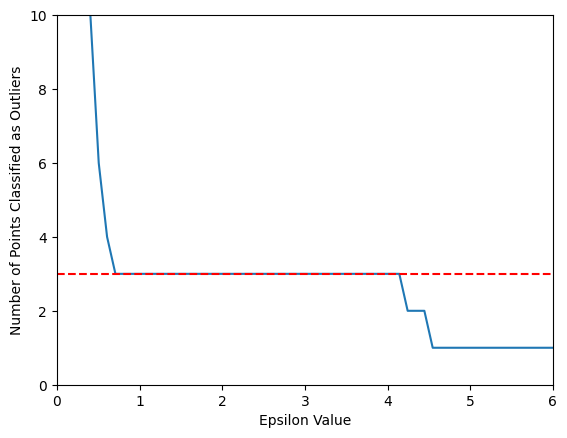

In [25]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

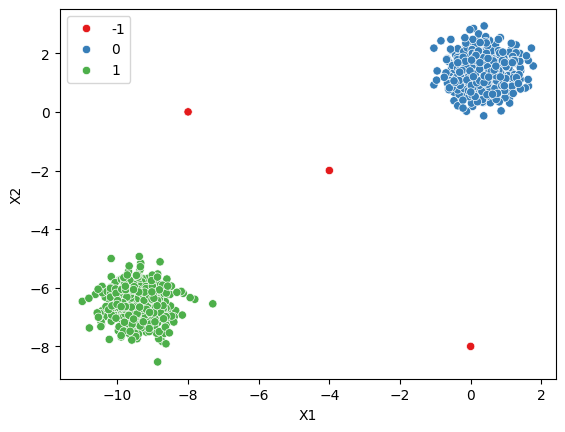

In [26]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples


In [27]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

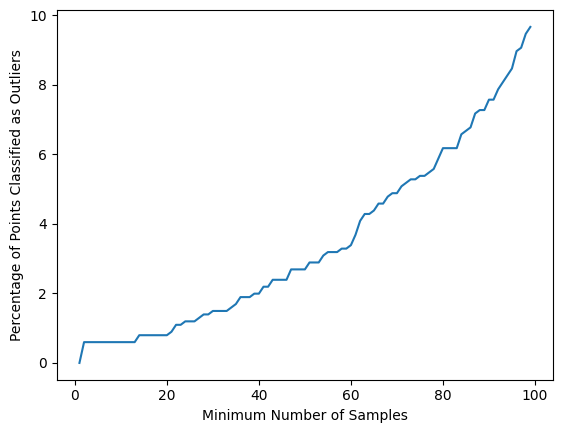

In [28]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

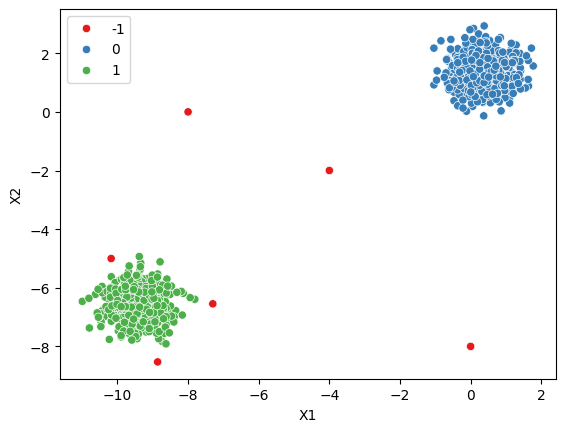

In [29]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

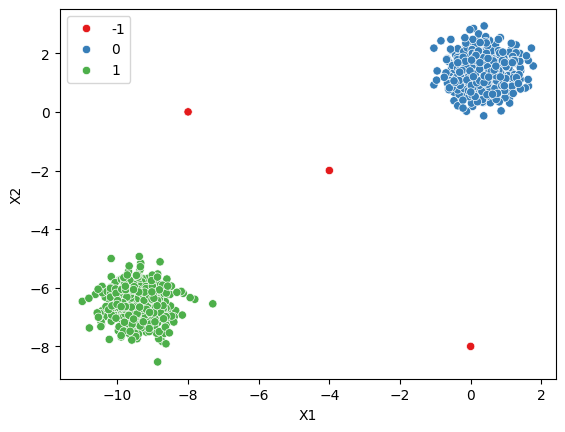

In [30]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

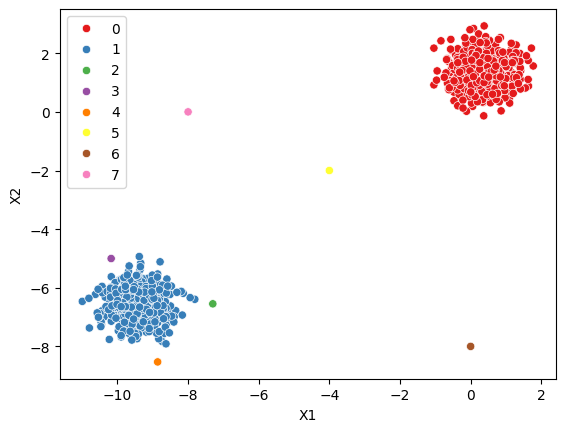

In [31]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

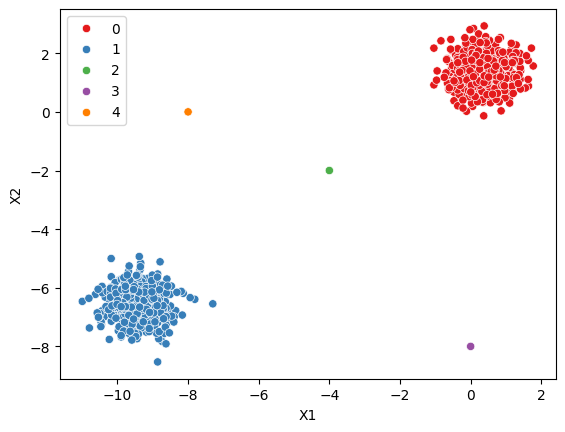

In [32]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

----